CausalRevIN_True vs CausalRevIN_True - RMSE: 0.0000, MAE: 0.0000, MASE: 0.0000
CausalRevIN_True vs CausalRevIN_False - RMSE: -0.5451, MAE: -0.5793, MASE: -0.1719
CausalRevIN_True vs PrefixRevIN_True - RMSE: -0.7579, MAE: -0.8411, MASE: -0.1818
CausalRevIN_True vs PrefixRevIN_False - RMSE: -0.2421, MAE: -0.2632, MASE: 0.0138
CausalRevIN_True vs RevIN_True - RMSE: -1.0182, MAE: -1.0812, MASE: -0.5911
CausalRevIN_True vs RevIN_False - RMSE: -1.0168, MAE: -1.0835, MASE: -0.6002
CausalRevIN_False vs CausalRevIN_True - RMSE: 0.3528, MAE: 0.3668, MASE: 0.1467
CausalRevIN_False vs CausalRevIN_False - RMSE: 0.0000, MAE: 0.0000, MASE: 0.0000
CausalRevIN_False vs PrefixRevIN_True - RMSE: -0.1377, MAE: -0.1658, MASE: -0.0084
CausalRevIN_False vs PrefixRevIN_False - RMSE: 0.1961, MAE: 0.2001, MASE: 0.1585
CausalRevIN_False vs RevIN_True - RMSE: -0.3062, MAE: -0.3178, MASE: -0.3577
CausalRevIN_False vs RevIN_False - RMSE: -0.3053, MAE: -0.3193, MASE: -0.3655
PrefixRevIN_True vs CausalRevIN_True - RM

/tmp/ipykernel_122951/3607760668.py:220: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 1])  # Leave space for colorbar


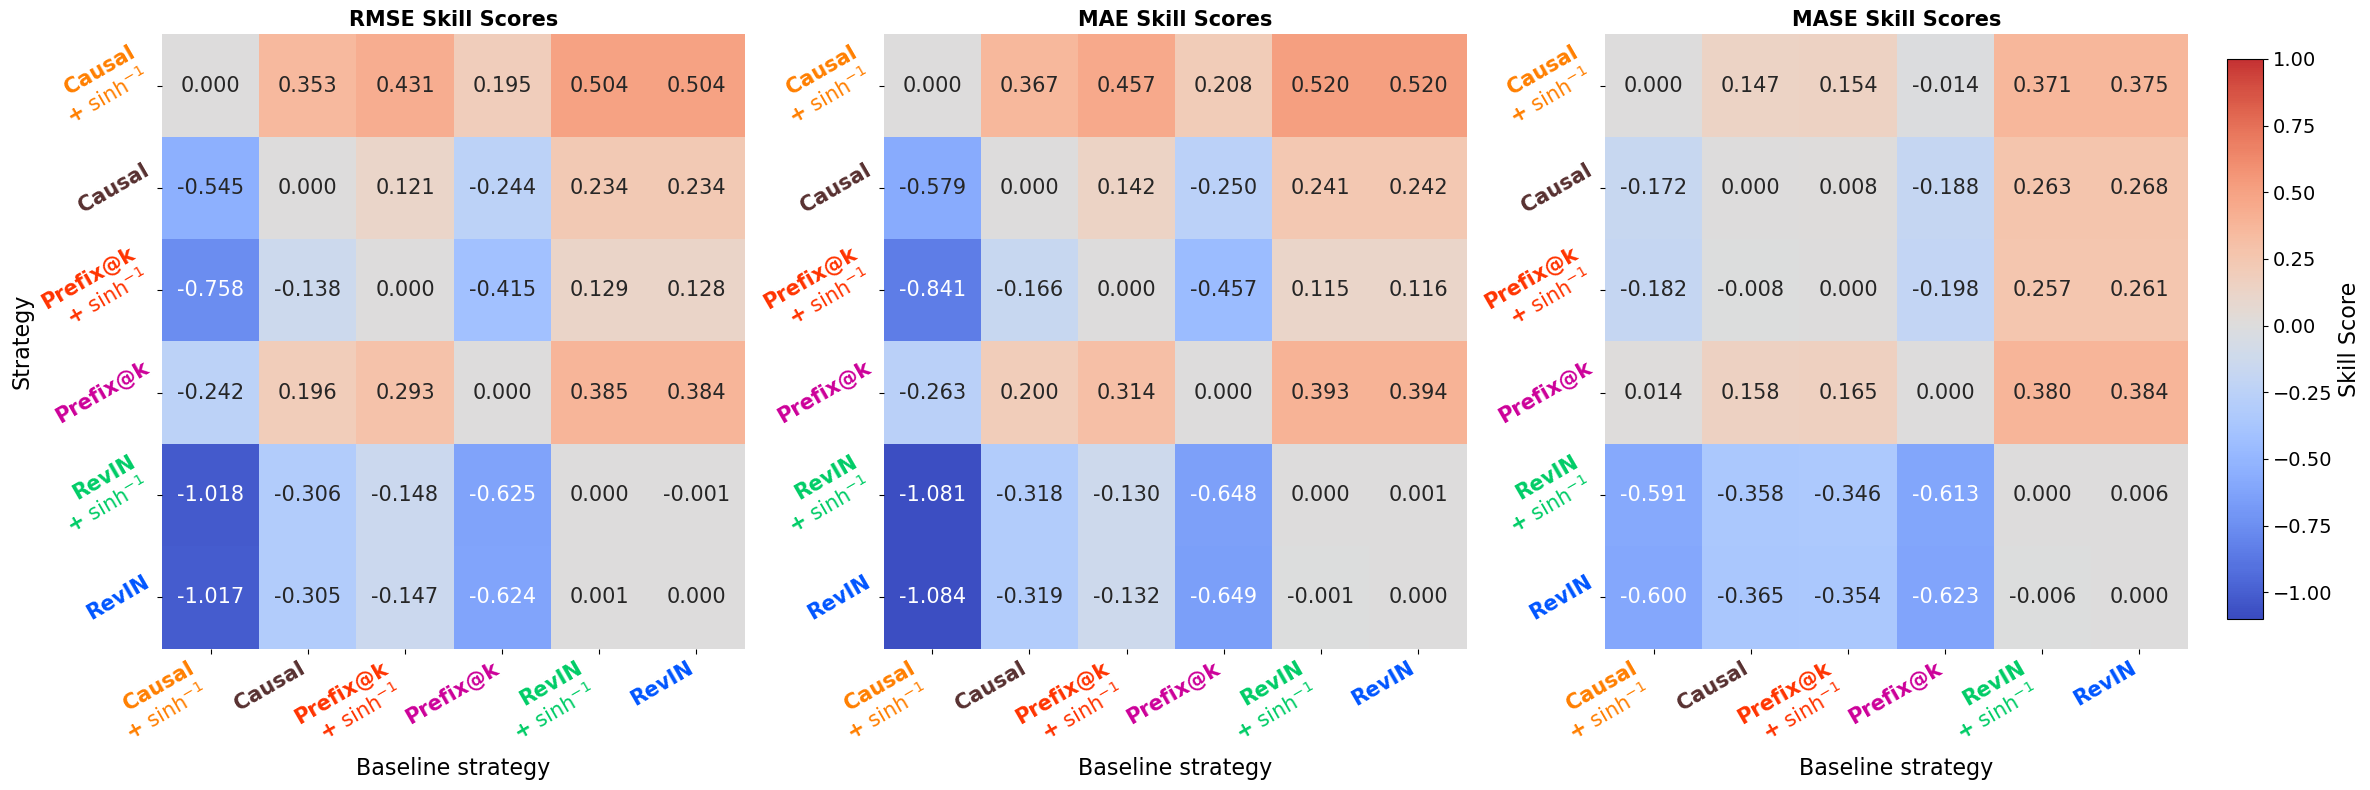

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model_name_to_show_label = {
    "CausalRevIN_True": r"Causal + $\sinh^{-1}$",
    "CausalRevIN_False": "Causal",
    "RevIN_True": r"RevIN + $\sinh^{-1}$",
    "RevIN_False": "RevIN",
    "PrefixRevIN_True": r"Prefix@k + $\sinh^{-1}$",
    "PrefixRevIN_False": "Prefix@k"
}

dic_model_colors = {
    r"Causal + $\sinh^{-1}$": "#FF7F00",  # vivid orange
    r"Causal":                 "#573030FF",  # semi-transparent brown
    r"RevIN + $\sinh^{-1}$":   "#00CC66",  # vivid green
    r"RevIN":                  "#0055FF",  # electric deep blue
    r"Prefix@k + $\sinh^{-1}$": "#FF3300",  # bright red-orange
    r"Prefix@k":               "#CC0099",  # strong magenta
}

def load_npz(filepath):
    """Load npz file and return as dictionary"""
    return np.load(filepath)

models = ["CausalRevIN_True", "CausalRevIN_False", "PrefixRevIN_True", 
          "PrefixRevIN_False", "RevIN_True", "RevIN_False"]

context_lengths = ["128", "256", "512"]
datasets = ["utsd", "gift_eval", "artificial"]

aggregated_skill_scores = {
    'mse': np.zeros((len(models), len(models))),
    'mae': np.zeros((len(models), len(models))),
    'mase': np.zeros((len(models), len(models)))
}

skill_scores_mse_matrix = np.zeros((len(models), len(models)))
skill_scores_mae_matrix = np.zeros((len(models), len(models)))
skill_scores_mase_matrix = np.zeros((len(models), len(models)))

for i, baseline in enumerate(models):
    for j, comparison in enumerate(models):
        mse_baseline = []
        mae_baseline = []
        mase_baseline = []
        mse_comparison = []
        mae_comparison = []
        mase_comparison = []
        
        for dataset in datasets:
            for context in context_lengths:
                try:
                    r_baseline = load_npz(f'../processed_results/{baseline}/{context}/results_{dataset}.npz')
                    r_comparison = load_npz(f'../processed_results/{comparison}/{context}/results_{dataset}.npz')
                    
                    for k1, k2 in zip(r_baseline, r_comparison):
                        assert k1 == k2, "Predictions do not match"
                        metric = k1.split("_")[0].lower()
                        
                        if metric == "rmse":
                            mse_baseline.append(r_baseline[k1].item())
                            mse_comparison.append(r_comparison[k2].item())
                        elif metric == "mae":
                            mae_baseline.append(r_baseline[k1].item())
                            mae_comparison.append(r_comparison[k2].item())
                        else:
                            mase_baseline.append(r_baseline[k1].item())
                            mase_comparison.append(r_comparison[k2].item())
                except FileNotFoundError:
                    print(f"Warning: Files not found for {baseline} or {comparison} on {dataset}")
                    continue
        
        if len(mse_baseline) > 0 and len(mse_comparison) > 0:
            scores_mse = []
            for p1, p2 in zip(mse_baseline, mse_comparison):
                scores_mse.append(p2/p1)
            scores_mse = np.array(scores_mse)
            scores_mse = np.clip(scores_mse, 0.01, 100)
            n = len(scores_mse)
            produit = np.prod(scores_mse)
            geometric_mean = produit ** (1/n)
            skill_scores_mse = 1 - geometric_mean
            skill_scores_mse_matrix[i, j] = skill_scores_mse
        
        # Calculate MAE skill score
        if len(mae_baseline) > 0 and len(mae_comparison) > 0:
            scores_mae = []
            for p1, p2 in zip(mae_baseline, mae_comparison):
                scores_mae.append(p2/p1)
            scores_mae = np.array(scores_mae)
            scores_mae = np.clip(scores_mae, 0.01, 100)
            n = len(scores_mae)
            produit = np.prod(scores_mae)
            geometric_mean = produit ** (1/n)
            skill_scores_mae = 1 - geometric_mean
            skill_scores_mae_matrix[i, j] = skill_scores_mae
        
        # Calculate MASE skill score
        if len(mase_baseline) > 0 and len(mase_comparison) > 0:
            scores_mase = []
            for p1, p2 in zip(mase_baseline, mase_comparison):
                scores_mase.append(p2/p1)
            scores_mase = np.array(scores_mase)
            scores_mase = np.clip(scores_mase, 0.01, 100)
            n = len(scores_mase)
            produit = np.prod(scores_mase)
            geometric_mean = produit ** (1/n)
            skill_scores_mase = 1 - geometric_mean
            skill_scores_mase_matrix[i, j] = skill_scores_mase
        
        print(f"{baseline} vs {comparison} - RMSE: {skill_scores_mse_matrix[i,j]:.4f}, "
              f"MAE: {skill_scores_mae_matrix[i,j]:.4f}, MASE: {skill_scores_mase_matrix[i,j]:.4f}")

aggregated_skill_scores['mse'] = skill_scores_mse_matrix.T
aggregated_skill_scores['mae'] = skill_scores_mae_matrix.T
aggregated_skill_scores['mase'] = skill_scores_mase_matrix.T

print("\n" + "="*50)
print("Aggregated skill scores across all context lengths")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

display_names = []
for m in models:
    label = model_name_to_show_label[m]
    if '+ $\sinh^{-1}$' in label:
        # Split into two rows
        label = label.replace(' + $\sinh^{-1}$', '\n+ $\sinh^{-1}$')
    display_names.append(label)

vmin, vmax = -1.1, 1

sns.heatmap(aggregated_skill_scores['mse'], annot=True, fmt='.3f', cmap='coolwarm', 
            xticklabels=display_names, yticklabels=display_names, 
            center=0, ax=axes[0], cbar=False, vmin=vmin, vmax=vmax,
            annot_kws={'fontsize': 15})
axes[0].set_title(f'RMSE Skill Scores', 
                           fontsize=15, fontweight='bold')
axes[0].set_xlabel('Baseline strategy', fontsize=16)
axes[0].set_ylabel('Strategy', fontsize=16)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=30, ha='right')
axes[0].tick_params(axis='both', labelsize=15)

for label in axes[0].get_xticklabels():
    original_text = label.get_text().replace('\n', ' ')
    label.set_color(dic_model_colors[original_text])
    label.set_fontweight('bold')
for label in axes[0].get_yticklabels():
    original_text = label.get_text().replace('\n', ' ')
    label.set_color(dic_model_colors[original_text])
    label.set_fontweight('bold')

sns.heatmap(aggregated_skill_scores['mae'], annot=True, fmt='.3f', cmap='coolwarm', 
            xticklabels=display_names, yticklabels=display_names, 
            center=0, ax=axes[1], cbar=False, vmin=vmin, vmax=vmax,
            annot_kws={'fontsize': 15})
axes[1].set_title(f'MAE Skill Scores', 
                           fontsize=15, fontweight='bold')
axes[1].set_xlabel('Baseline strategy', fontsize=16)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=30, ha='right')
axes[1].tick_params(axis='both', labelsize=15)

for label in axes[1].get_xticklabels():
    original_text = label.get_text().replace('\n', ' ')
    label.set_color(dic_model_colors[original_text])
    label.set_fontweight('bold')
for label in axes[1].get_yticklabels():
    original_text = label.get_text().replace('\n', ' ')
    label.set_color(dic_model_colors[original_text])
    label.set_fontweight('bold')

sns.heatmap(aggregated_skill_scores['mase'], annot=True, fmt='.3f', cmap='coolwarm', 
            xticklabels=display_names, yticklabels=display_names, 
            center=0, ax=axes[2], cbar=False, vmin=vmin, vmax=vmax,
            annot_kws={'fontsize': 15})
axes[2].set_title(f'MASE Skill Scores', 
                           fontsize=15, fontweight='bold')
axes[2].set_xlabel('Baseline strategy', fontsize=16)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=30, ha='right')
axes[2].set_yticklabels(axes[2].get_yticklabels(), rotation=30, ha='right')
axes[2].tick_params(axis='both', labelsize=15)

for label in axes[2].get_xticklabels():
    original_text = label.get_text().replace('\n', ' ')
    label.set_color(dic_model_colors[original_text])
    label.set_fontweight('bold')
for label in axes[2].get_yticklabels():
    original_text = label.get_text().replace('\n', ' ')
    label.set_color(dic_model_colors[original_text])
    label.set_fontweight('bold')

fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.93, 0.22, 0.015, 0.7])  
cbar = fig.colorbar(axes[2].collections[0], cax=cbar_ax)
cbar.set_label('Skill Score', fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout(rect=[0, 0, 0.92, 1]) 
plt.savefig('figures/skill_score/skill_scores.pdf', format='pdf', dpi=300)